In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
def random_points(n):
  points = []
  points = make_blobs(n)
  return points[0]
  
def dist(pntA, pntB):
  return np.sqrt((pntA[0] - pntB[0])**2 + (pntA[1] - pntB[1])**2)

def calculate_mean(points):
  x_mean = 0
  y_mean = 0
  count = 0

  for i in range(len(points)):
    x_mean += points[i][0]
    y_mean += points[i][1]
    count += 1

  x_mean /= count
  y_mean /= count

  return [x_mean, y_mean]

def init_center(points, k): 
  pnt_mean = calculate_mean(points)
  R = -1

  for i in range(len(points)):
    current_dist = dist(points[i], pnt_mean);
    if R < current_dist:
      R = current_dist
  centroids = []
  for i in range(k):
    x_c = R*np.cos(2*np.pi*i/k) + pnt_mean[0]    
    y_c = R*np.sin(2*np.pi*i/k) + pnt_mean[1] 
    centroids.append([x_c, y_c])

  return np.array(centroids)  


def calculate_nearest_centroid(points, centroids):
  clusters = {} 

  for i in range(len(centroids)):
    clusters[i] = []

  for i in range(len(points)):
    points_range = []

    for j in range(len(centroids)):
      points_range.append(dist(points[i], centroids[j]))

    index = points_range.index(min(points_range))
    clusters[index].append(points[i])

  return clusters


def centroids_update(centroids, clusters):
    k = len(centroids)
    for i in range(k):
      if (len(clusters[i]) != 0):
        centroids[i] = calculate_mean(clusters[i])
    return centroids

def is_equals(centroids, privious_centroids):
  return (centroids == privious_centroids).all()    

In [3]:
def draw(clusters, centroids):
  for i in range(len(clusters)):
    x_coordinates = []
    y_coordinates = []
    for j in range(len(clusters[i])):
      x_coordinates.append(clusters[i][j][0])
      y_coordinates.append(clusters[i][j][1])
    plt.scatter(x_coordinates, y_coordinates)
  plt.draw()

  x_coordinates_c = []
  y_coordinates_c = []
  for i in range(len(centroids)):
    x_coordinates_c.append(centroids[i][0])
    y_coordinates_c.append(centroids[i][1])
  plt.scatter(x_coordinates_c, y_coordinates_c, color='hotpink')  
  plt.draw()

  plt.show()

In [4]:
def kmeans(points, k, draw_iteration = False):
  centroids = init_center(points, k)    
  clusters = calculate_nearest_centroid(points, centroids)
  privious_centroids = copy.deepcopy(centroids)

  if (draw_iteration):
    draw(clusters, centroids)

  while True:
    centroids = centroids_update(centroids, clusters)
    clusters = calculate_nearest_centroid(points, centroids)

    if (draw_iteration):
      draw(clusters, centroids)
    
    if is_equals(centroids, privious_centroids):
      return { "centroids": centroids, "clusters": clusters }

    privious_centroids = copy.deepcopy(centroids)

In [5]:
def cluster_count(inertia):
  min_inertia_ratio = 100000
  index = 0

  for i in range(len(inertia)):
    if i == 0 or i == len(inertia) - 1:
      continue 
    inertia_ratio = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    if abs(inertia_ratio) < min_inertia_ratio:
      min_inertia_ratio = inertia_ratio
      index = i
  return index + 1

In [6]:
if __name__ == '__main__':
  n = 100

  points = random_points(n)

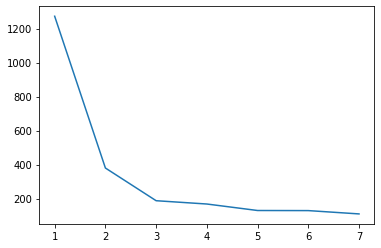

In [7]:
# просчитывание оптимального k

inertia = []
K = range(1,8)

for i in K:
    km = kmeans(points, i)
    clasters = km["clusters"]
    centroids = km["centroids"]
    sum = 0
    for kl in range(len(clasters)):
      for c in range(len(clasters[kl])):
        sum += dist(centroids[kl], clasters[kl][c])**2

    inertia.append(sum)   
plt.plot(K, inertia) 
k = cluster_count(inertia)

5


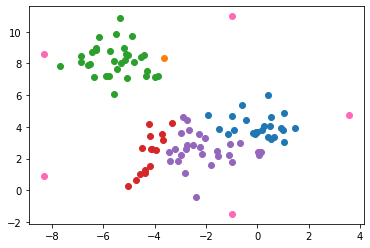

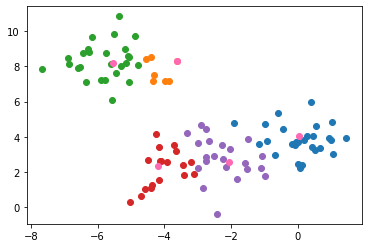

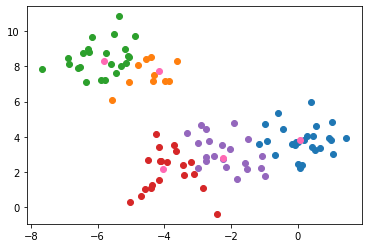

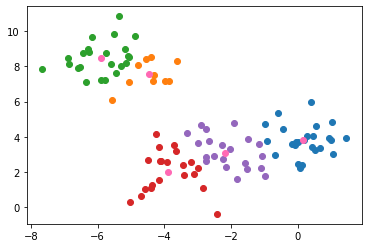

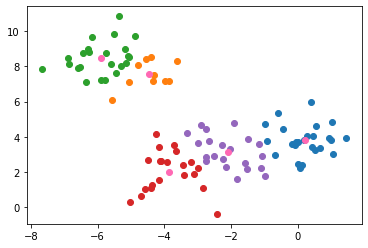

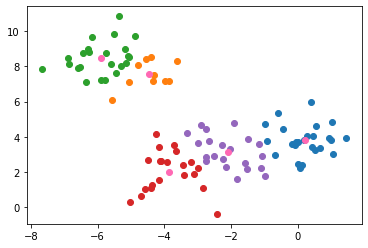

In [12]:
# для заданного k
print(k)
kmeans_item = kmeans(points, k, True)
